In [1]:
# Add Matplotlib inline magic command

%matplotlib inline
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#file to load
city_data_to_load = 'c:/users/gskil/class/pyber_analysis/starter_code/resources/city_data.csv'
ride_data_to_load = 'c:/users/gskil/class/pyber_analysis/starter_code/resources/ride_data.csv'

#read the city and ride data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


In [2]:
# Combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#break down city types into individual data frames

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [4]:
#DataFrame for Suburban type

suburban_cities_df= pyber_data_df[pyber_data_df["type"]=="Suburban"]

suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [5]:
#dataframe for rural type

rural_cities_df= pyber_data_df[pyber_data_df["type"]=="Rural"]

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [6]:
#1 get the total rides for each city type

total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# 2 the total drivers for each city type

total_drivers= city_data_df.groupby(["type"]).sum()["driver_count"]


total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# 3. get the total amount of fares for each city type

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# 4. Get the average fare per ride for each city type. 

avg_fare_per_ride= sum_fares_by_type / total_rides

avg_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
#5 get the avg fare per driver for each city type

avg_fare_driver= sum_fares_by_type / total_drivers

avg_fare_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
# 6 create DataFrame summary

summary_df= pd.DataFrame()

summary_df["Total Rides"]= total_rides

summary_df["Total Drivers"]= total_drivers

summary_df["Total Fares"]= sum_fares_by_type

summary_df["Average Fare per Ride"]= avg_fare_per_ride

summary_df["Average Fare per Driver"]= avg_fare_driver


summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
# 7. delete the index name

summary_df.index.name = None

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#not sure how my dataframe became objects 

summary_df['Total Rides']=summary_df['Total Rides'].astype(int)

summary_df['Total Drivers']=summary_df['Total Drivers'].astype(int)

summary_df['Total Fares']=summary_df['Total Fares'].astype(float)

summary_df['Average Fare per Ride']=summary_df['Average Fare per Ride'].astype(float)


In [14]:
summary_df.dtypes

Total Rides                  int32
Total Drivers                int32
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [15]:
# 8. format the columns 

summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [16]:
# Print the merged DataFrame for reference.

print(pyber_data_df)


                    city                 date   fare        ride_id  \
0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
4             South Jack  2019-03-06 04:28:35  34.58  3908451377344   
...                  ...                  ...    ...            ...   
2370         Michaelberg  2019-04-29 17:04:39  13.38  8550365057598   
2371     Lake Latoyabury  2019-01-30 00:05:47  20.76  9018727594352   
2372         North Jaime  2019-02-10 21:03:50  11.11  2781339863778   
2373        West Heather  2019-05-07 19:22:15  44.94  4256853490277   
2374          Newtonview  2019-04-25 10:20:13  55.84  9990581345298   

      driver_count   type  
0                5  Urban  
1               72  Urban  
2               57  Urban  
3               34  Urban  
4      

In [17]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 

# for each date where the indices are the city type and date.

df= pyber_data_df.groupby(["date", "type"]).sum()[["fare"]]

df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [18]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

df= df.reset_index()

In [19]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

df = pyber_data_df.pivot(index ='date',columns = 'type', values = 'fare')

df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [20]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.

dates_df= df.loc['2019-01-01':'2019-04-29']

dates_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [21]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

dates_df.index = pd.to_datetime(dates_df.index)

In [22]:
# 6. Check that the datatype for the index is datetime using df.info()

dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [23]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week

dates_df= dates_df.resample('W').sum()

dates_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


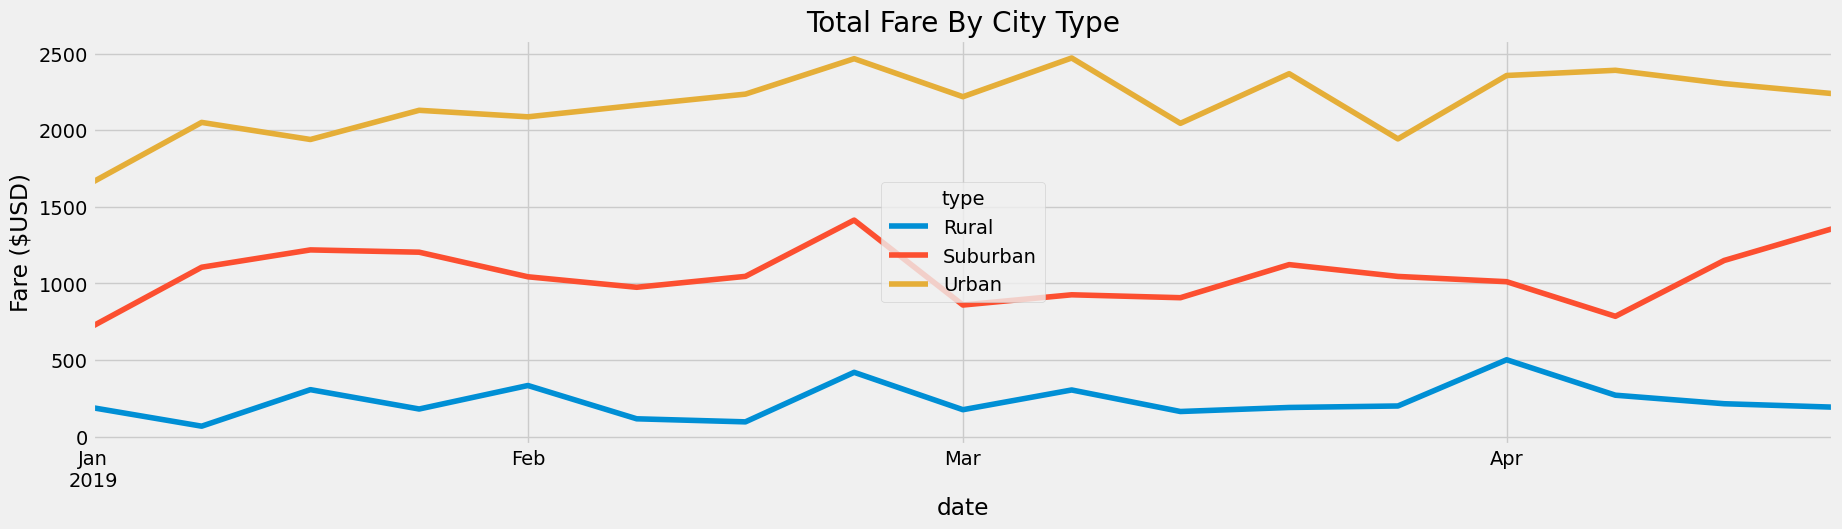

In [40]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

from matplotlib import style

dates_df.plot(figsize = (20,5))

style.use('fivethirtyeight')

plt.title("Total Fare By City Type")

plt.ylabel("Fare ($USD)")

plt.savefig("c:/users/gskil/class/pyber_analysis/analysis/Pyber_fare_summary.png")

